# GA Fungi Observations Report

"A data quality and visualization report for local Georgia fungi observations, gathered from the Inaturalist database."

- Report Timeframe: September 1, 2024 - October 31, 2024
- Dataset Source: Inaturalist.com

Feature Query modifications:  
- quality_grade=research
- identifications=most_agree
- captive=false
- geoprivacy=open
- taxon_geoprivacy=open
- iconic_taxa[]=Fungi
- place_id=23
- taxon_id=47170
- verifiable=true
- d1=2024-9-01 
- d2=2024-11-01
- spam=false

Columns: 
[ id, observed_on_string, observed_on, time_observed_at, time_zone, user_id, user_login, created_at, quality_grade, license, url, image_url, tag_list, description, num_identification_agreements, num_identification_disagreements, place_guess, latitude, longitude, positional_accuracy, public_positional_accuracy, positioning_method, positioning_device, place_town_name, place_state_name, species_guess, scientific_name, common_name, iconic_taxon_name, taxon_id, taxon_genus_name, taxon_species_name ]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv('./data/fungi observations september-october 24.csv')

# Check for data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                1550 non-null   int64  
 1   observed_on_string                1550 non-null   object 
 2   observed_on                       1550 non-null   object 
 3   time_observed_at                  1541 non-null   object 
 4   time_zone                         1550 non-null   object 
 5   user_id                           1550 non-null   int64  
 6   user_login                        1550 non-null   object 
 7   created_at                        1550 non-null   object 
 8   quality_grade                     1550 non-null   object 
 9   license                           1076 non-null   object 
 10  url                               1550 non-null   object 
 11  image_url                         1550 non-null   object 
 12  tag_li

In [7]:
# Get basic descriptive statistics
data.describe()

,id,user_id,num_identification_agreements,num_identification_disagreements,latitude,longitude,positional_accuracy,public_positional_accuracy,taxon_id
count,1.550000e+03,1.550000e+03,1550.000000,1550.000000,1550.000000,1550.000000,1334.000000,1334.000000,1.550000e+03
mean,2.444639e+08,4.793590e+06,1.275484,0.003871,33.642581,-83.977639,1147.466267,1147.466267,4.470478e+05
std,2.750539e+06,2.749764e+06,0.524031,0.062117,0.810585,0.880883,13042.755795,13042.755795,4.376807e+05
min,2.391703e+08,1.096700e+04,1.000000,0.000000,30.682389,-85.491233,1.000000,1.000000,4.739200e+04
25%,2.421907e+08,1.917394e+06,1.000000,0.000000,33.613819,-84.381714,6.000000,6.000000,1.180840e+05
50%,2.447917e+08,5.230482e+06,1.000000,0.000000,33.806507,-84.233728,25.000000,25.000000,2.272535e+05
75%,2.464676e+08,7.285745e+06,1.000000,0.000000,33.946916,-83.861176,87.000000,87.000000,7.869180e+05
max,2.508165e+08,8.738568e+06,6.000000,1.000000,34.983398,-80.891778,423885.000000,423885.000000,1.560597e+06


In [12]:
# get first 5 rows of data
data.sample(5)

,id,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,created_at,quality_grade,license,...,positioning_device,place_town_name,place_state_name,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id,taxon_genus_name,taxon_species_name
1249,246932750,2024-10-12 10:29:59-04:00,2024-10-12,2024-10-12 14:29:59 UTC,Eastern Time (US & Canada),8657698,yehwancheong,2024-10-12 14:31:30 UTC,research,CC-BY-NC,...,NaN,NaN,Georgia,도장버섯,Daedaleopsis confragosa,Thin-walled Maze Polypore,Fungi,124102,Daedaleopsis,Daedaleopsis confragosa
1360,247511062,2024-10-15 14:50:18-04:00,2024-10-15,2024-10-15 18:50:18 UTC,Eastern Time (US & Canada),2952805,larosaacademy,2024-10-15 18:51:09 UTC,research,NaN,...,NaN,NaN,Georgia,turkey-tail,Trametes versicolor,turkey-tail,Fungi,54134,Trametes,Trametes versicolor
1463,249173776,2024-10-25 14:58:41-04:00,2024-10-25,2024-10-25 18:58:41 UTC,Eastern Time (US & Canada),1703065,mpearlstein,2024-10-26 15:19:16 UTC,research,CC-BY-NC,...,NaN,NaN,Georgia,Painted Suillus,Suillus spraguei,Painted Suillus,Fungi,782231,Suillus,Suillus spraguei
979,245779031,2024-10-04 13:05:51,2024-10-04,2024-10-04 17:05:51 UTC,Eastern Time (US & Canada),6493486,james_exe,2024-10-05 17:24:38 UTC,research,CC-BY-NC,...,gps,NaN,Georgia,green-spored parasol,Chlorophyllum molybdites,green-spored parasol,Fungi,117308,Chlorophyllum,Chlorophyllum molybdites
563,243140387,2024-09-21 13:48:15-04:00,2024-09-21,2024-09-21 17:48:15 UTC,Eastern Time (US & Canada),2506897,decaturjosh,2024-09-21 17:52:29 UTC,research,CC0,...,NaN,NaN,Georgia,Candleflame Lichen,Candelaria concolor,Candleflame Lichen,Fungi,69430,Candelaria,Candelaria concolor


# Count Observations and Unique Species
Counting the total observations and the number of unique fungi species. This can give us an idea of the dataset's diversity.

In [10]:
# Total number of observations
total_observations = data.shape[0]

# Count of unique species
unique_species_count = data['taxon_species_name'].nunique()  # Replace 'species_name' with the correct column name

print("Total Observations:", total_observations)
print("Unique Species:", unique_species_count)


Total Observations: 1550
Unique Species: 317


# Temporal Analysis - Observations Over Time
We’ll plot the number of observations over time. This will help us understand if there are any trends or spikes in fungi activity over the observation period.

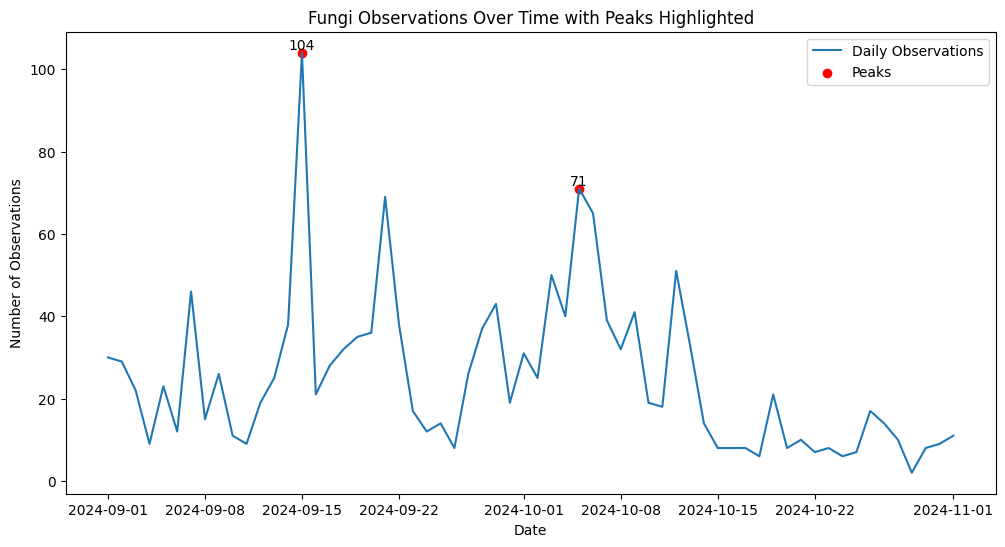

In [39]:

import matplotlib.pyplot as plt

# Define a threshold for peak observations, for example, 75 observations
peak_threshold = 70

# Identify dates with observations above the threshold
peaks = observations_per_day[observations_per_day > peak_threshold]

# Plotting the temporal trend of observations
plt.figure(figsize=(12, 6))
observations_per_day.plot(label='Daily Observations')
plt.scatter(peaks.index, peaks.values, color='red', marker='o', label='Peaks')  # Mark peaks

# Add annotations
for date, value in peaks.items():
    plt.text(date, value, f'{value}', ha='center', va='bottom')

plt.title("Fungi Observations Over Time with Peaks Highlighted")
plt.xlabel("Date")
plt.ylabel("Number of Observations")
plt.legend()
plt.show()



# Geographic Distribution of Observations
We can create a scatter plot on a map to show the geographic distribution of observations.

In [26]:
import folium

# Set up the map centered around Georgia
map_center = [32.1656, -82.9001]  # Latitude and longitude for Georgia
m = folium.Map(location=map_center, zoom_start=7)

# Add a marker for each observation
for idx, row in data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],  # Replace with actual column names
        radius=3,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(m)

# Display the map
m


# Species Diversity Visualization
A bar chart showing the most commonly observed fungi species. This highlights the diversity in the dataset.

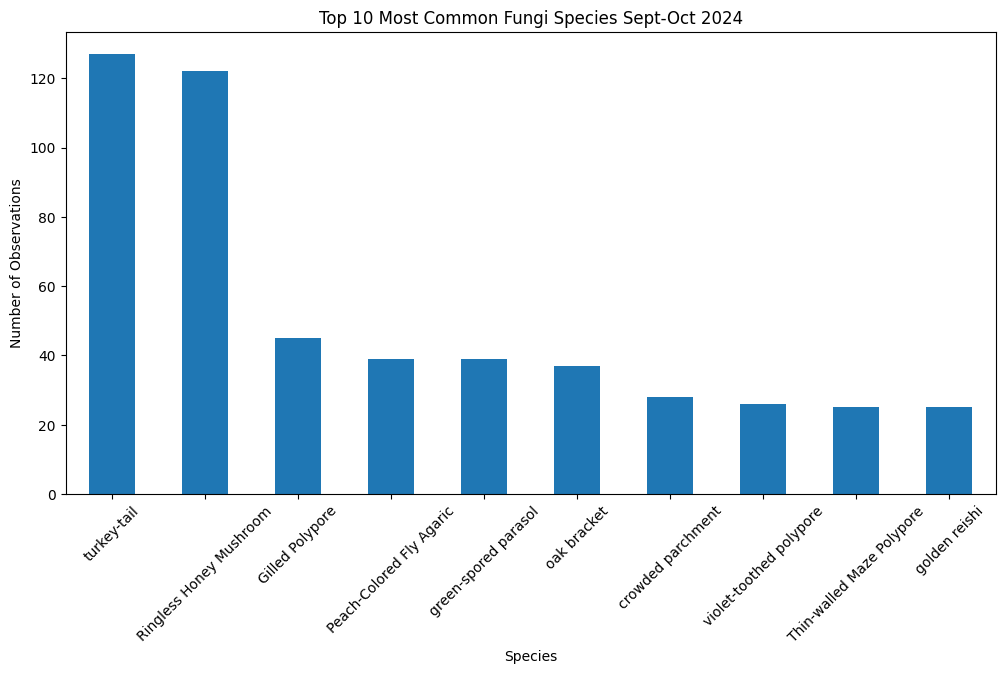

In [28]:
# Count observations per species
species_counts = data['common_name'].value_counts().head(10)  # Top 10 most common species

# Plotting the species diversity
plt.figure(figsize=(12, 6))
species_counts.plot(kind='bar')
plt.title('Top 10 Most Common Fungi Species Sept-Oct 2024')
plt.xlabel('Species')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.show()


# Observer Activity Analysis
Identifying the most active observers. A fun way to recognize contributors.

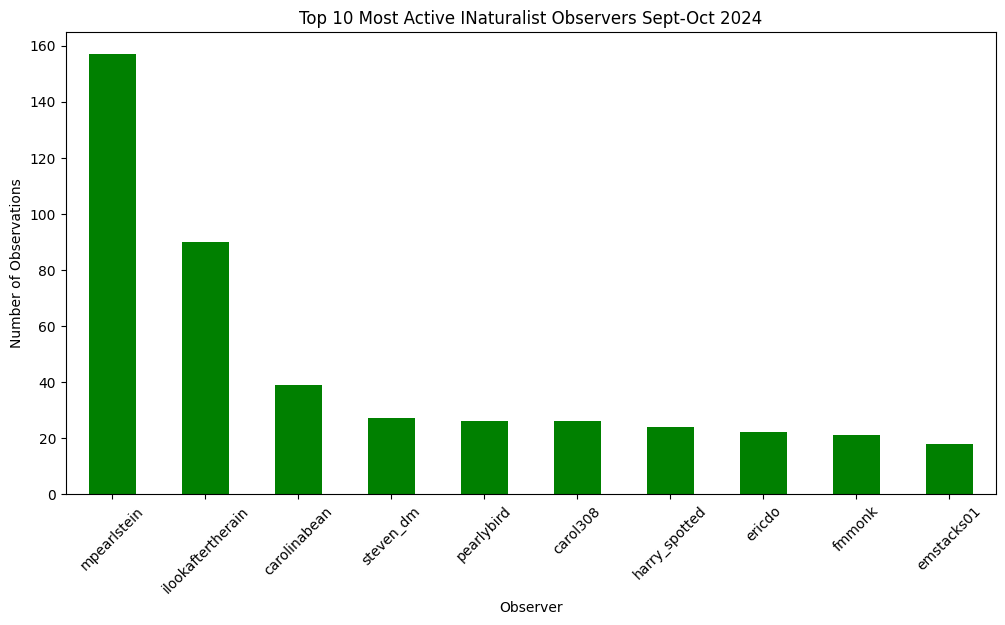

In [33]:
# Count observations per observer
observer_counts = data['user_login'].value_counts().head(10)  # Replace 'observer' with the correct column name

# Plotting observer activity
plt.figure(figsize=(12, 6))
observer_counts.plot(kind='bar', color='green')
plt.title('Top 10 Most Active INaturalist Observers Sept-Oct 2024')
plt.xlabel('Observer')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.show()


# Conclusion and Insights
In this report, we analyzed iNaturalist data for 1550 fungi observations in Georgia from September 1 to October 31, 2024. Here are some key insights derived from each visualization:

Temporal Trends:

- The line chart showing daily observations reveals clear peak observation days, particularly around early and mid-September. These peaks could align with optimal conditions for fungi growth, such as recent rainfall, cooler temperatures, or other seasonal changes that promote fungi activity.

- Highlighting these peak days can guide future mushroom foraging activities and help predict ideal times for observation in future years.

Geographic Distribution:

- The map of observations demonstrates a high concentration of fungi observations in northern Georgia, particularly around the metro Atlanta area and surrounding forests. This concentration might reflect either higher fungi biodiversity in those regions or simply areas with a more active observer base.

- Such geographic clustering could inform conservation efforts, research focus areas, or the planning of group foraging events in fungi-rich zones.

Species Diversity:

- With over 300 unique species observed, Georgia exhibits considerable fungal biodiversity within just a two-month period. The top observed species, such as Turkey Tail and Ringless Honey Mushroom, indicate some of the more common and perhaps easier-to-spot fungi in the region.

- Observing which species are most common helps in identifying both widespread and potentially rare fungi, offering valuable insights into local fungal ecosystems and guiding foraging enthusiasts on what to expect in these habitats.

Community Engagement:

- Recognizing the most active observers highlights the contributions of dedicated individuals within the fungi foraging and citizen science community. For example, the top observer contributed over 150 observations, showcasing a strong commitment to data collection.

- Acknowledging these active participants could encourage further engagement, helping to grow the community and promote more consistent data collection in the future.

Overall Insights and Future Directions:

- This report provides a snapshot of fungal activity and community engagement in Georgia during early fall. Observing temporal and geographic patterns, along with the diversity and commonality of species, offers valuable insights for both amateur and expert mycologists.

- For future reports, additional data such as weather patterns, habitat types, or soil data could deepen our understanding of fungi growth patterns. 

# Saving Plots and Text Directly to PDF with PdfPages
To save all outputs (visualizations, data summaries, and text) into a single PDF file, we can use Python's matplotlib along with the Fpdf or PdfPages from matplotlib.backends.backend_pdf, which allows saving multiple plots in one document.

In [40]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Create a PdfPages object
with PdfPages('fungi_observations_report.pdf') as pdf:
    # Save each plot to the PDF
    # Example for multiple plots; repeat this for each plot
    
    # Plot 1: Line chart of observations over time
    plt.figure(figsize=(10, 6))
    # Define a threshold for peak observations, for example, 75 observations
    peak_threshold = 70

    # Identify dates with observations above the threshold
    peaks = observations_per_day[observations_per_day > peak_threshold]

    # Plotting the temporal trend of observations
    plt.figure(figsize=(12, 6))
    observations_per_day.plot(label='Daily Observations')
    plt.scatter(peaks.index, peaks.values, color='red', marker='o', label='Peaks')  # Mark peaks

    # Add annotations
    for date, value in peaks.items():
        plt.text(date, value, f'{value}', ha='center', va='bottom')

    plt.title("Fungi Observations Over Time with Peaks Highlighted")
    plt.xlabel("Date")
    plt.ylabel("Number of Observations")
    plt.legend()
    pdf.savefig()  # Save the current plot to the PDF
    plt.close()
    
    # Plot 2: Bar chart of top fungis
    plt.figure(figsize=(10, 6))
    # (Your plotting code here)
    # Count observations per species
    species_counts = data['common_name'].value_counts().head(10)  # Top 10 most common species

    # Plotting the species diversity
    species_counts.plot(kind='bar')
    plt.title('Top 10 Most Common Fungi Species Sept-Oct 2024')
    plt.xlabel('Species')
    plt.ylabel('Number of Observations')
    plt.xticks(rotation=45)
    pdf.savefig()  # Save the current plot to the PDF
    plt.close()

    # Plot 3: Bar chart of top observers
    plt.figure(figsize=(10, 6))
    # (Your plotting code here)
    # Count observations per observer
    observer_counts = data['user_login'].value_counts().head(10)  # Replace 'observer' with the correct column name

    # Plotting observer activity
    observer_counts.plot(kind='bar', color='green')
    plt.title('Top 10 Most Active INaturalist Observers Sept-Oct 2024')
    plt.xlabel('Observer')
    plt.ylabel('Number of Observations')
    plt.xticks(rotation=45)
    pdf.savefig()  # Save the current plot to the PDF
    plt.close()
    
    # You can add text by plotting it in a matplotlib figure
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.text(0.5, 0.5, "Summary of Findings", fontsize=12, ha='center')
    pdf.savefig(fig)
    plt.close()

# This saves fungi_observations_report.pdf with all plots and text


<Figure size 1000x600 with 0 Axes>